# We will now start coding in python! We are going to load our counts data from featureCounts and do some calculations 

First we need to import all the python packages that we will use. We will do that in the following cell. **WARNING** you most likely won't have all these packages installed. If you get the error "Cannot import package name ...." You need to go back to your command line and install it on tscc. 

Remember how we installed things before? Try conda, then bioconda, then pip. Once you have installed it on your command line on tscc, you will need to restart your kernel to refresh those changes (Kernel - Restart)

**NOTE - **since these are python specific packages, you will not be able to tell if they installed properly on your command line with 

    which packagename
   
Instead, you will first need to open python in your terminal with:

    python
    
Then try to import it (this is the same thing you do in a Jupyter notebook)

    import packagename
    
If you don't get any errors, then success! It is installed. To get out of python and back to your normal command line:

    quit()
    
**Don't be afraid of error messages! Learn how to read them and solve them!!**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [3]:
# This notebook is linked to TSCC, so we can load data directly by providing 
# the full path of the file location on tscc. Change the directory below to match your path
directory = '/home/ucsd-train##/scratch/projects/lin28b_shrna/all_bams/'

# We are going to load the featurecounts file and assign it to the variable name: counts
# change the "featureCounts.txt" to match the filename you used in your featureCounts script
counts = pd.read_csv(directory+"featureCounts.txt",sep="\t",index_col=0,
                    comment="#")
print counts.shape
counts.head()

(57820, 10)


,Chr,Start,End,Strand,Length,/home/ucsd-train01/scratch/annotations/allchrom.fa,lin28b_ctrl_rep1.bam,lin28b_ctrl_rep2.bam,lin28b_kd_rep1.bam,lin28b_kd_rep2.bam
Geneid,,,,,,,,,,
ENSG00000223972.4,chr1;chr1;chr1;chr1,11869;12595;12975;13221,12227;12721;13052;14412,+;+;+;+,1756,0,0,2,0,0
ENSG00000227232.4,chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;c...,14363;14970;15796;16607;16854;17233;17498;1760...,14829;15038;15947;16765;17055;17368;17504;1774...,-;-;-;-;-;-;-;-;-;-;-;-;-,2073,0,294,294,334,410
ENSG00000243485.2,chr1;chr1;chr1,29554;30267;30976,30039;30667;31109,+;+;+,1021,0,0,0,0,0
ENSG00000237613.2,chr1;chr1;chr1,34554;35245;35721,35174;35481;36081,-;-;-,1219,0,0,2,4,7
ENSG00000268020.2,chr1;chr1,52473;54830,53312;54936,+;+,947,0,0,0,0,0


In [4]:
#Let's drop unnecessary columns

#Look at the column names in your dataframe above, we only want to keep Length and the four files
#containing the count information. Make sure the names that you have after drop below match the 
#column names that you want to eliminate

counts.drop(['Chr','Start','End','Strand',
              '/home/ucsd-train01/scratch/annotations/allchrom.fa'], 
           axis=1, inplace=True)
counts.head()

,Length,lin28b_ctrl_rep1.bam,lin28b_ctrl_rep2.bam,lin28b_kd_rep1.bam,lin28b_kd_rep2.bam
Geneid,,,,,
ENSG00000223972.4,1756,0,2,0,0
ENSG00000227232.4,2073,294,294,334,410
ENSG00000243485.2,1021,0,0,0,0
ENSG00000237613.2,1219,0,2,4,7
ENSG00000268020.2,947,0,0,0,0


In [ ]:
#Here we are going to change the name of the columns by providing a list of the new column names we want to use. Order matters!

counts.columns = [['Length','lin28b_ctrl_rep1','lin28b_ctrl_rep2','lin28b_kd_rep1','lin28b_kd_rep2']]
counts.head()

In [6]:
#We will save this counts matrix to use as the input for differential expression. 
#This will be saved in the directory location that you defined above and will have the filename 
#counts_for_deseq2.csv
counts.to_csv(directory+'counts_for_deseq2.csv')

In [8]:
#We also need to make a condition matrix for deseq2. The row names need to match the column names
#from the count matrix and we will assign a condition to each row

conditions = pd.DataFrame(index = counts.columns[1:])
conditions.head()

""
lin28b_ctrl_rep1
lin28b_ctrl_rep2
lin28b_kd_rep1
lin28b_kd_rep2


In [9]:
#Make sure the features listed below match the order of the rows that are listed in the 
#conditions dataframe that is printed above. If necessary, change the order to match your
#setup. Check that the conditions match on the dataframe created below

features= ['control','control','knockdown','knockdown']
conditions['condition'] = features
conditions.head()

,condition
lin28b_ctrl_rep1,control
lin28b_ctrl_rep2,control
lin28b_kd_rep1,knockdown
lin28b_kd_rep2,knockdown


In [9]:
#We will save this conditions matrix to use as the input for differential expression. 
#This will be saved in the that you defined above and will have the filename 
#counts_for_deseq2.csv

conditions.to_csv(directory+"conditions_matrix_deseq2.csv")

In [10]:
#Here is a handy function that will turn our counts matrix into RPKM

#You don't need to do anything here other than run the cell

def counts_to_rpkm(featureCountsTable):
    counts = featureCountsTable.ix[:,1:]
    lengths = featureCountsTable['Length']
    mapped_reads = counts.sum()
    return (counts * pow(10,9)).div(mapped_reads, axis=1).div(lengths, axis=0)

In [11]:
#Now we are applying the function we wrote in the cell above to our data and looking at the first 5 lines
#of our output dataframe. We are also looking at the total number of rows and columns we have in our 
#dataframe with shape

rpkm = counts_to_rpkm(counts)
print rpkm.shape
rpkm.head()

(57820, 4)


,lin28b_ctrl_rep1.bam,lin28b_ctrl_rep2.bam,lin28b_kd_rep1.bam,lin28b_kd_rep2.bam
Geneid,,,,
ENSG00000223972.4,0.000000,0.062309,0.000000,0.000000
ENSG00000227232.4,9.087219,7.758734,10.038027,8.460869
ENSG00000243485.2,0.000000,0.000000,0.000000,0.000000
ENSG00000237613.2,0.000000,0.089757,0.204436,0.245655
ENSG00000268020.2,0.000000,0.000000,0.000000,0.000000


In [12]:
#To get rid of a lot of noise, we are going to drop rows that have combined RPKM less than 4
#We are going to save the clean output in dataframe called rpkm_filtered

rpkm_filtered = rpkm.loc[rpkm.sum(axis=1) > 4]
print rpkm_filtered.shape
rpkm_filtered.head()

(11973, 4)


,lin28b_ctrl_rep1.bam,lin28b_ctrl_rep2.bam,lin28b_kd_rep1.bam,lin28b_kd_rep2.bam
Geneid,,,,
ENSG00000227232.4,9.087219,7.758734,10.038027,8.460869
ENSG00000238009.2,1.543956,1.992690,2.391527,1.953761
ENSG00000237683.5,18.444499,24.506101,35.775001,33.052831
ENSG00000239906.1,2.182092,1.863086,4.822127,5.959920
ENSG00000241860.2,1.996177,0.953730,1.267157,0.987473


In [13]:
#Now we will save the file. Note that it will go to the same location we defined as 
#directory above and it will be given the filename rpkm_filtered.csv
rpkm_filtered.to_csv(directory+"rpkm_filtered.csv")

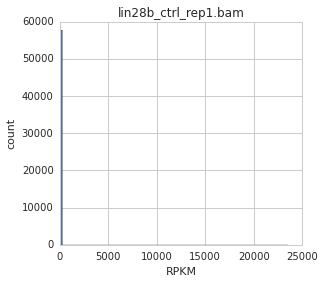

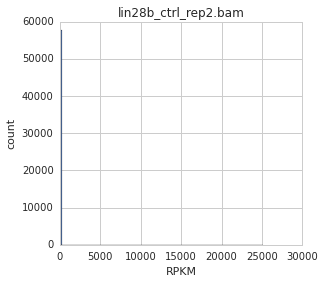

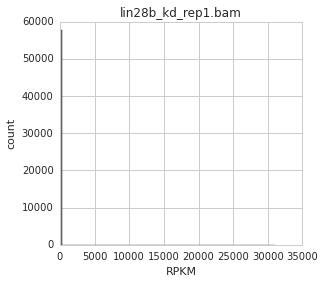

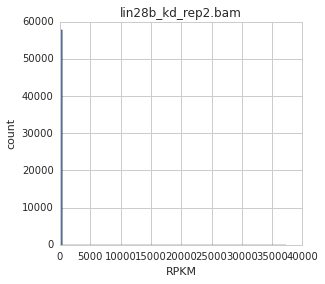

In [14]:
#Let's look at a histogram of the rpkm values for each sample.
#Notice how the vast majority cluster near zero. Let's tranfsorm our data to a log2 scale 
#for better viewing.
sns.set_style("whitegrid")
for i, a in zip(rpkm.columns, range(1,5)):
    plt.figure(figsize=(20,4))
    plt.subplot(1,4,a)
    plt.hist(rpkm[i], bins=100)
    plt.xlabel("RPKM")
    plt.ylabel("count")
    plt.title(i)

In [15]:
#Now let's take the log2RPKM we will look at the size and the first 5 lines of the output dataframe

rpkm_log2 = np.log2(rpkm_filtered)
print rpkm_log2.shape
rpkm_log2.head()

(11973, 4)


,lin28b_ctrl_rep1.bam,lin28b_ctrl_rep2.bam,lin28b_kd_rep1.bam,lin28b_kd_rep2.bam
Geneid,,,,
ENSG00000227232.4,3.183839,2.955821,3.327404,3.080806
ENSG00000238009.2,0.626631,0.994717,1.257932,0.966254
ENSG00000237683.5,4.205119,4.615069,5.160880,5.046702
ENSG00000239906.1,1.125712,0.897695,2.269670,2.575293
ENSG00000241860.2,0.997239,-0.068348,0.341595,-0.018187


In [16]:
#First we have to replace negative infinite values with 0 in order to plot a histogram. This is an 
#artifact of taking the log2 of very small numbers

rpkm_log2.replace(to_replace='-inf', value=0, inplace=True)

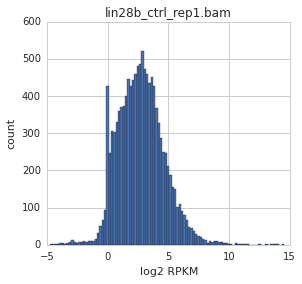

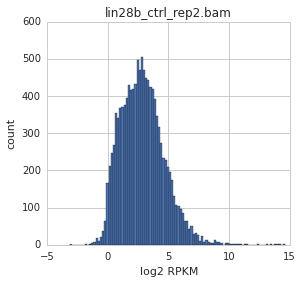

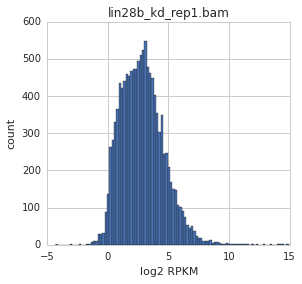

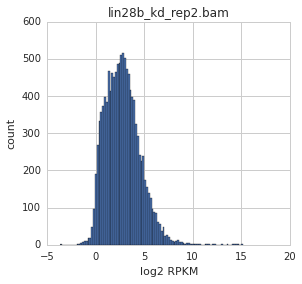

In [17]:
sns.set_style("whitegrid")
for i, a in zip(rpkm_log2.columns, range(1,5)):
    plt.figure(figsize=(20,4))
    plt.subplot(1,4,a)
    plt.hist(rpkm_log2[i], bins=100)
    plt.xlabel("log2 RPKM")
    plt.ylabel("count")
    plt.title(i)

In [18]:
#Let's filter again to remove rows where the average log2RPKM < 0

rpkm_log2_filtered = rpkm_log2.loc[rpkm_log2.mean(axis=1) > 0]
print rpkm_log2_filtered.shape
rpkm_log2_filtered.head()

(11847, 4)


,lin28b_ctrl_rep1.bam,lin28b_ctrl_rep2.bam,lin28b_kd_rep1.bam,lin28b_kd_rep2.bam
Geneid,,,,
ENSG00000227232.4,3.183839,2.955821,3.327404,3.080806
ENSG00000238009.2,0.626631,0.994717,1.257932,0.966254
ENSG00000237683.5,4.205119,4.615069,5.160880,5.046702
ENSG00000239906.1,1.125712,0.897695,2.269670,2.575293
ENSG00000241860.2,0.997239,-0.068348,0.341595,-0.018187


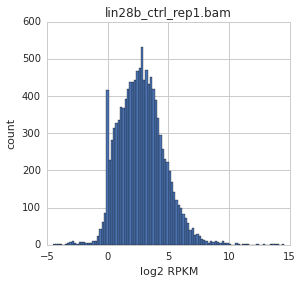

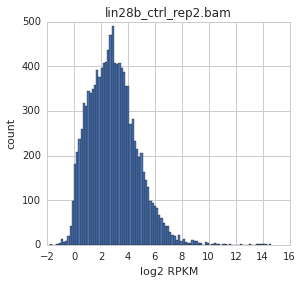

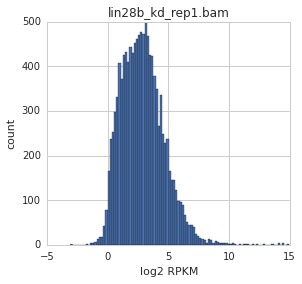

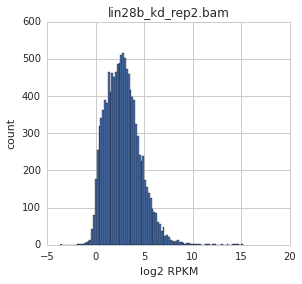

In [19]:
#Now we will makehistograms of the log2 transformed values of rpkm

sns.set_style("whitegrid")
for i, a in zip(rpkm_log2_filtered.columns, range(1,5)):
    plt.figure(figsize=(20,4))
    plt.subplot(1,4,a)
    plt.hist(rpkm_log2_filtered[i], bins=100)
    plt.xlabel("log2 RPKM")
    plt.ylabel("count")
    plt.title(i)

In [20]:
#Now we will save the file. Note that it will go to the same location we defined as 
#directory above and it will be given the filename rpkm_log2_filtered.csv
rpkm_log2_filtered.to_csv(directory+"rpkm_log2_filtered.csv")

/home/ecwheele/anaconda2/lib/python2.7/site-packages/matplotlib-1.4.2-py2.7-linux-x86_64.egg/matplotlib/collections.py:571: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


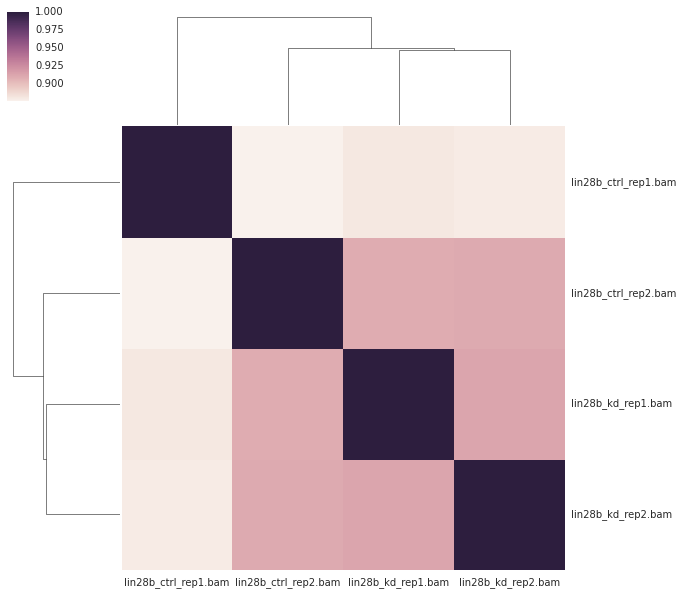

In [23]:
#This will make a clustermap based on the rpkm values we calculated clustering based on spearman correlation

sns.clustermap(rpkm.corr(method='spearman'))

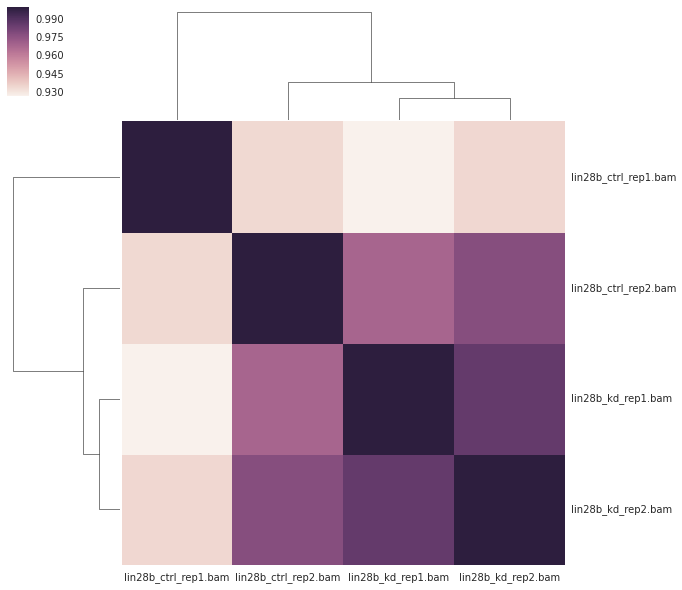

In [24]:
#How does the clustering look different when we only include information from the filtered dataframe?

sns.clustermap(rpkm_filtered.corr(method='spearman'))